<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercice-1-:-Un-benchmark-rapide" data-toc-modified-id="Exercice-1-:-Un-benchmark-rapide-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercice 1 : Un benchmark rapide</a></span><ul class="toc-item"><li><span><a href="#Exercice-1.1" data-toc-modified-id="Exercice-1.1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercice 1.1</a></span></li><li><span><a href="#Exercice-1.2" data-toc-modified-id="Exercice-1.2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercice 1.2</a></span></li><li><span><a href="#Exercice-1.3" data-toc-modified-id="Exercice-1.3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exercice 1.3</a></span></li></ul></li><li><span><a href="#Exercice-2-:-Régularisation" data-toc-modified-id="Exercice-2-:-Régularisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercice 2 : Régularisation</a></span><ul class="toc-item"><li><span><a href="#Exercice-2.1" data-toc-modified-id="Exercice-2.1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercice 2.1</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Exercice-2.2" data-toc-modified-id="Exercice-2.2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exercice 2.2</a></span></li></ul></li><li><span><a href="#Exercice-3-:-Interprétation-des-erreurs-de-classification" data-toc-modified-id="Exercice-3-:-Interprétation-des-erreurs-de-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercice 3 : Interprétation des erreurs de classification</a></span><ul class="toc-item"><li><span><a href="#Exercice-3.1" data-toc-modified-id="Exercice-3.1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercice 3.1</a></span></li><li><span><a href="#Exercice-3.2" data-toc-modified-id="Exercice-3.2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exercice 3.2</a></span></li><li><span><a href="#Exercice-3.3." data-toc-modified-id="Exercice-3.3.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Exercice 3.3.</a></span></li></ul></li><li><span><a href="#Exercice-4-:-Interprétation-des-paramètres-du-modèle" data-toc-modified-id="Exercice-4-:-Interprétation-des-paramètres-du-modèle-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercice 4 : Interprétation des paramètres du modèle</a></span><ul class="toc-item"><li><span><a href="#Exercice-4.1" data-toc-modified-id="Exercice-4.1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercice 4.1</a></span></li><li><span><a href="#Exercice-4.2" data-toc-modified-id="Exercice-4.2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exercice 4.2</a></span></li></ul></li></ul></div>

# Lab 4: Classification Linéaire

Le [Fashion-MNIST dataset](https://www.openml.org/d/40996) contient 70 000 images de produits de mode Zalando, classées en 10 types de vêtements, chacun représenté par des valeurs de 28 pixels sur 28. Nous allons voir dans quelle mesure nous pouvons les classer à l'aide de modèles linéaires. Commençons par examiner nos données :

![](https://static.observableusercontent.com/files/99783ef5e2d8670f89eaf1b8f3ae703e04d8ead78572ac1b12590d3d3c0eb8585d3f30bf406150b337545019aa22deb3070f323d0b987e95eca7c6a8a5de2d88)

In [1]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

In [2]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

C:\Users\zumso\AppData\Local\Temp\ipykernel_17368\80936212.py:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  fmnist = oml.datasets.get_dataset(40996)


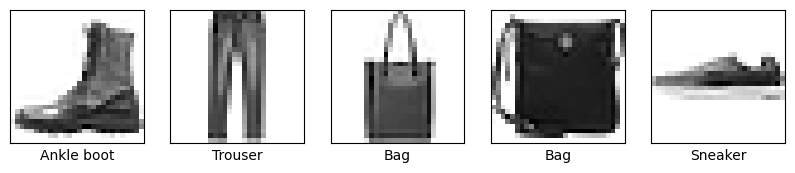

In [3]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show()

## Exercice 1 : Un benchmark rapide
Tout d'abord, nous allons essayer les paramètres par défaut [Régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) et [SVM linéaires](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC). Cliquez sur les liens pour lire la documentation. Nous les comparerons également à [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) comme point de référence. Pour voir si nos modèles sont surajoutés, nous évaluons également l'erreur de l'ensemble d'apprentissage. Cela peut être fait en utilisant [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) au lieu de [`cross_val_scores`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

Pour l'instant, nous sommes juste intéressés par une approximation rapide, donc nous n'utilisons pas l'ensemble des données pour nos expériences. Au lieu de cela, nous utilisons 10% de nos échantillons :

In [4]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

Avec ce petit échantillon de nos données, nous pouvons maintenant entraîner et évaluer les trois classificateurs.

### Exercice 1.1
Implémentez une fonction ci-dessous qui évalue chaque classificateur qui lui est passé sur les données données données, et qui renvoie les scores de formation et de test de chaque classificateur sous forme de liste. Vous êtes autorisé à importer des fonctions supplémentaires à partir de n'importe quel module, mais vous devriez être capable de compléter la fonction avec la fonction [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) et les composants standards de Python. Sous la fonction, vous trouverez un exemple de sortie.

In [5]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    train_scores = []
    test_scores = []
    
    for classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=5, return_train_score=True)
        train_scores.append(cv_results['train_score'])
        test_scores.append(cv_results['test_score'])
    return train_scores, test_scores

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                               [0.867, 0.868, 0.865, 0.866, 0.866]], # Classifier 3 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.
#                               [0.804, 0.814, 0.806, 0.821, 0.806]]) # Classifier 3 test score for each of 5 folds.

### Exercice 1.2
Appelez la fonction que vous avez créée avec un classificateur de régression logistique, de SVM linéaire et de k-voisins les plus proches.
Stockez les valeurs de retour dans les variables `train_scores` et `test_scores`. Ensuite, exécutez le code donné ci-dessous pour produire un graphique visualisant les scores.

In [6]:
# Dummy code. Replace with the actual classifiers and scores
classifiers = [LogisticRegression(), LinearSVC(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, X, y)

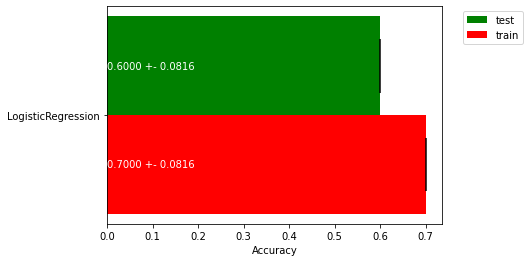

In [ ]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots()
width=0.3
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.4f} +- {:.4f}".format(np.mean(te),np.std(te)), color='white', va='center')
    ax.text(0, i-width, "{:.4f} +- {:.4f}".format(np.mean(tr),np.std(tr)), color='white', va='center')
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=[c.__class__.__name__ for c in classifiers])
ax.set_xlabel('Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Exercice 1.3
Interprétez le graphique. Quel est le meilleur classificateur ? L'un des modèles est-il surajouté ? Si c'est le cas, que pouvons-nous faire pour résoudre ce problème ? Les résultats présentent-ils une grande variance ?

## Exercice 2 : Régularisation
Nous allons maintenant régler les principaux hyperparamètres de régularisation de ces algorithmes : le coût de mauvaise classification dans les SVM (C), le paramètre de régularisation dans la régression logistique (C), et le nombre de voisins (n_voisins) dans le kNN. Nous pensons que l'optimum pour les paramètres C se situe dans $[10^{-12},10^{12}]$ et pour n_voisins entre 1 et 50. C devrait varier sur une échelle logarithmique (c'est-à-dire [0,01, 0,1, 1, 10, 100]) et k devrait varier uniformément (c'est-à-dire [1,2,3,4]).

### Exercice 2.1
Faites varier les paramètres de régularisation dans l'intervalle indiqué ci-dessus et, pour chaque classificateur, créez un graphique linéaire qui représente les scores d'entraînement et de test pour chaque valeur de l'hyperparamètre de régularisation. Vous devez donc produire 3 tracés, un pour chaque classificateur. Utilisez la validation croisée 5 fois par défaut pour tous les scores, mais ne tracez que les moyennes.

Conseils :
* Pensez à la complexité temporelle de ces modèles. Essayer trop de valeurs d'hyperparamètres peut prendre trop de temps.
* Vous pouvez utiliser les fonctions numpy [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace) et [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace).
* Vous pouvez utiliser la fonction par défaut [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) de matplotlib pour tracer les scores de formation et de test.
* Vous pouvez boucler manuellement sur les plages d'hyperparamètres, ou vous pouvez déjà consulter la fonction [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) de scikit-learn pour économiser un peu de programmation. Nous la reverrons plus tard dans le cours.

#### Solution

In [ ]:
logistic_regres = LogisticRegression()
svc = LinearSVC() 
knn = KNeighborsClassifier()

C_param_range = np.logspace(-12,12,25)
n_neighbors_param_range = np.list(0,50,1)
C_param_grid = {'C' : C_param_range,}
n_neighbors_param_grid = {"n_neighbors" : list(range(1,51))}


In [8]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

In [ ]:
from sklearn.model_selection import GridSearchCV
logistic_regres_grid_search = GridSearchCV(logistic_regres, Xs, ys, cv=5, scoring="accuracy")
plot_tuning(logistic_regres_grid_search, "C")

### Exercice 2.2
Interprétez les graphiques. Quand les méthodes sont-elles sous-adaptées ? Quand sont-elles surajustées ? Quelle est leur sensibilité à l'hyperparamètre de régularisation ?

## Exercice 3 : Interprétation des erreurs de classification
Il est probable que vos modèles ne soient pas encore parfaits. Il est important de comprendre le type d'erreurs qu'il commet encore. Regardons de plus près quelles instances sont mal classées et quelles classes sont souvent confondues.
Entraînez le modèle de régression logistique avec `C=1e-7`. Entraînez le modèle sur un ensemble d'entraînement et faites des prédictions sur un ensemble de test (les deux ensembles doivent être échantillonnés à partir de notre sous-échantillon de 10 %).

In [9]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [ ]:
selected_logistic_model = LogisticRegression(C=10**-7)
selected_logistic_model.fit(X_train, y_train)
logistic_model_pred = selected_logistic_model.predict(X_test)

### Exercice 3.1
Entraînez le classificateur comme décrit ci-dessus, obtenez les prédictions `y_pred` sur l'ensemble de test, et identifiez tous les échantillons mal classés `misclassified_samples`. Ensuite, exécutez le code de visualisation ci-dessous pour étudier les erreurs de classification.

In [10]:
# Implement the code to obtain the actual predictions on the test set
y_pred = list(y_test) # dummy values, replace y_test with the actual predictions

# Implement the code to obtain the indices of the misclassified samples
# Example output:
# misclassified_samples = [  11,   12,   14,   23,   30,   34,   39,   46,   50,   52,   55]
misclassified_samples = [0,1,2,3,4] # dummy values

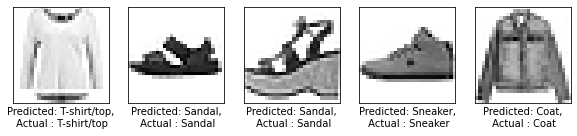

In [11]:
# Visualize the (first five) misclassifications, together with the predicted and actual class
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

### Exercice 3.2
Interprétez les résultats. Ces erreurs de classification sont-elles prévisibles ? 

### Exercice 3.3.
Exécutez le code ci-dessous sur vos résultats pour dessiner la matrice de confusion complète et obtenir plus d'informations sur les erreurs de classification systématiques 
de votre modèle. Une matrice de confusion indique la quantité d'exemples pour chaque paire de classes vraies et prédites. Interprétez les résultats. 
Votre modèle produit-il certains types d'erreurs plus souvent que d'autres ? 

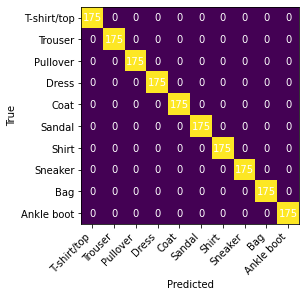

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Exercice 4 : Interprétation des paramètres du modèle
Enfin, nous allons examiner de plus près les paramètres du modèle, c'est-à-dire les coefficients de nos modèles linéaires. Comme il s'agit d'images de 28x28 pixels, nous devons apprendre 784 coefficients. Que signifient ces coefficients ? Nous commencerons par les représenter sous la forme d'images de 28x28 pixels.

### Exercice 4.1
Entraînez un modèle de régression logistique et un SVM linéaire en utilisant les hyperparamètres ajustés de l'exercice 2. 
En cas de doute, utilisez `C=1e-7` pour LogReg et `C=1e-8` pour le SVM. 
Passez le modèle entraîné à la fonction de traçage fournie. Interprétez les résultats en détail. 
Pourquoi obtenez-vous plusieurs tracés par modèle ? Que représentent les caractéristiques dans vos données ? 
Les modèles semblent-ils prêter attention aux bonnes caractéristiques ?
Les modèles semblent-ils ignorer certaines caractéristiques ? Observez-vous des différences de qualité entre les différentes classes ? Observez-vous des différences entre les modèles ?

In [13]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

### Exercice 4.2
Répétez l'exercice précédent, mais maintenant uniquement avec la régression logistique. En plus d'une version ajustée, ajoutez également un modèle qui surajoute beaucoup et un autre qui sousajoute beaucoup. Interprétez et expliquez les résultats.